In [737]:
import joblib
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

## Define models

In [738]:
# Randome Forest
rf_path = '/Users/Administrator/Documents/University/Year 3/2b/Thesis/Bachelor-Thesis/trained_models/RandomForestRegressor_trained.pkl'
rf_model = joblib.load(rf_path)

# XGBoost
xgb_path = '/Users/Administrator/Documents/University/Year 3/2b/Thesis/Bachelor-Thesis/trained_models/XGBRegressor_trained.pkl'
xgb_model = joblib.load(xgb_path)

# Linear Regression
lr_path = '/Users/Administrator/Documents/University/Year 3/2b/Thesis/Bachelor-Thesis/trained_models/Ridge_trained.pkl'
lr_model = joblib.load(lr_path)

# YEAR 2010

In [739]:
year = 2010

In [740]:
grid_data_populated_path = f'/Users/Administrator/Documents/University/Year 3/2b/Thesis/Bachelor-Thesis/data/aligned/grid_{year}.csv'
grid_df_2010 = pd.read_csv(grid_data_populated_path)

In [741]:
grid_df_2010 = grid_df_2010.dropna()
len(grid_df_2010)

2948

In [742]:
features = ['population', 'groundwater depth', 'elevation', 'landuse code',
            'precipitation','temperature', 'n deposition',
            'mainsoilclassification_1', 'organicmattercontent_1', 'density_1',
            'acidity_1', 'lon', 'lat']
X_grid = grid_df_2010[features]

## Predict using all models

In [743]:
grid_df_2010["nitrate_pred_rf"] = np.maximum(rf_model.predict(X_grid), 0)
grid_df_2010["nitrate_pred_xgb"] = np.maximum(xgb_model.predict(X_grid), 0)
# grid_df_2010["nitrate_pred_lr"] = np.maximum(lr_model.predict(X_grid), 0)


/Users/Administrator/Documents/University/Year 3/2b/Thesis/Bachelor-Thesis/spatial_env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/Administrator/Documents/University/Year 3/2b/Thesis/Bachelor-Thesis/spatial_env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [744]:
grid_df_2010

,geometry,date,soil region,landuse code,population,groundwater depth,elevation,lon,lat,precipitation,temperature,n deposition,mainsoilclassification_1,organicmattercontent_1,density_1,acidity_1,nitrate_pred_rf,nitrate_pred_xgb
0,POINT (5.070910195735319 52.170624786472544),2010-07-01 10:00:00+00:00,veen,26.0,30.0,-1.153000,0.875438,5.07091,52.170625,0.75,137.233333,16.318155,Veengronden,40.0,0.543,4.5,0.424999,0.534930
1,POINT (5.075910195735319 52.16562478647254),2010-07-01 10:00:00+00:00,veen,45.0,0.0,-1.153000,-2.295543,5.07591,52.165625,0.75,137.233333,16.318155,Veengronden,40.0,0.543,4.5,0.365549,0.682364
2,POINT (5.075910195735319 52.170624786472544),2010-07-01 10:00:00+00:00,veen,1.0,115.0,-1.153000,-2.573272,5.07591,52.170625,0.75,137.233333,16.318155,Veengronden,40.0,0.543,4.5,0.586192,0.716065
3,POINT (5.080910195735319 52.16062478647254),2010-07-01 10:00:00+00:00,veen,1.0,125.0,-1.153000,-1.684335,5.08091,52.160625,0.75,137.233333,18.041016,Moerige gronden,25.0,0.597,4.8,0.161804,0.170631
7,POINT (5.085910195735319 52.16062478647254),2010-07-01 10:00:00+00:00,veen,1.0,125.0,-1.153000,-1.595895,5.08591,52.160625,0.75,137.233333,18.041016,Moerige gronden,9.0,1.260,4.8,0.171007,0.176420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3960,POINT (5.620910195735307 51.96062478647244),2010-07-01 10:00:00+00:00,zand,1.0,0.0,6.524896,6.000000,5.62091,51.960625,0.75,137.233333,21.878934,Rivierkleigronden,6.0,1.280,5.1,0.094224,0.028139
3961,POINT (5.620910195735307 51.96562478647244),2010-07-01 10:00:00+00:00,zand,1.0,0.0,6.524896,6.956209,5.62091,51.965625,0.75,137.233333,21.878934,Rivierkleigronden,5.0,1.246,5.3,0.081413,0.073880
3962,POINT (5.620910195735307 51.97062478647244),2010-07-01 10:00:00+00:00,zand,1.0,0.0,6.524896,6.000000,5.62091,51.970625,0.75,137.233333,19.805898,Rivierkleigronden,6.0,1.152,5.3,0.079147,0.028272
3963,POINT (5.620910195735307 51.975624786472444),2010-07-01 10:00:00+00:00,zand,1.0,0.0,6.524896,5.956651,5.62091,51.975625,0.75,137.233333,18.517254,Rivierkleigronden,6.0,1.152,5.3,0.088796,0.033184


In [745]:
# Shape: (n_models, n_samples)
predictions = np.vstack([
    grid_df_2010["nitrate_pred_rf"].values,
    grid_df_2010["nitrate_pred_xgb"].values
    # grid_df_2010["nitrate_pred_lr"].values
])

In [746]:
# Compute std per model
model_stds = np.std(predictions, axis=1)  # std per model
inv_model_stds = 1 / (model_stds + 1e-8)  # avoid division by zero
model_weights = inv_model_stds / np.sum(inv_model_stds)  # normalize

print("Model Weights:", model_weights)

Model Weights: [0.50729953 0.49270047]


In [747]:
# Weighted average
ensemble_pred = np.average(predictions, axis=0, weights=model_weights)

# Save to DataFrame
grid_df_2010["nitrate_pred_ensemble"] = ensemble_pred

## Display ensemble

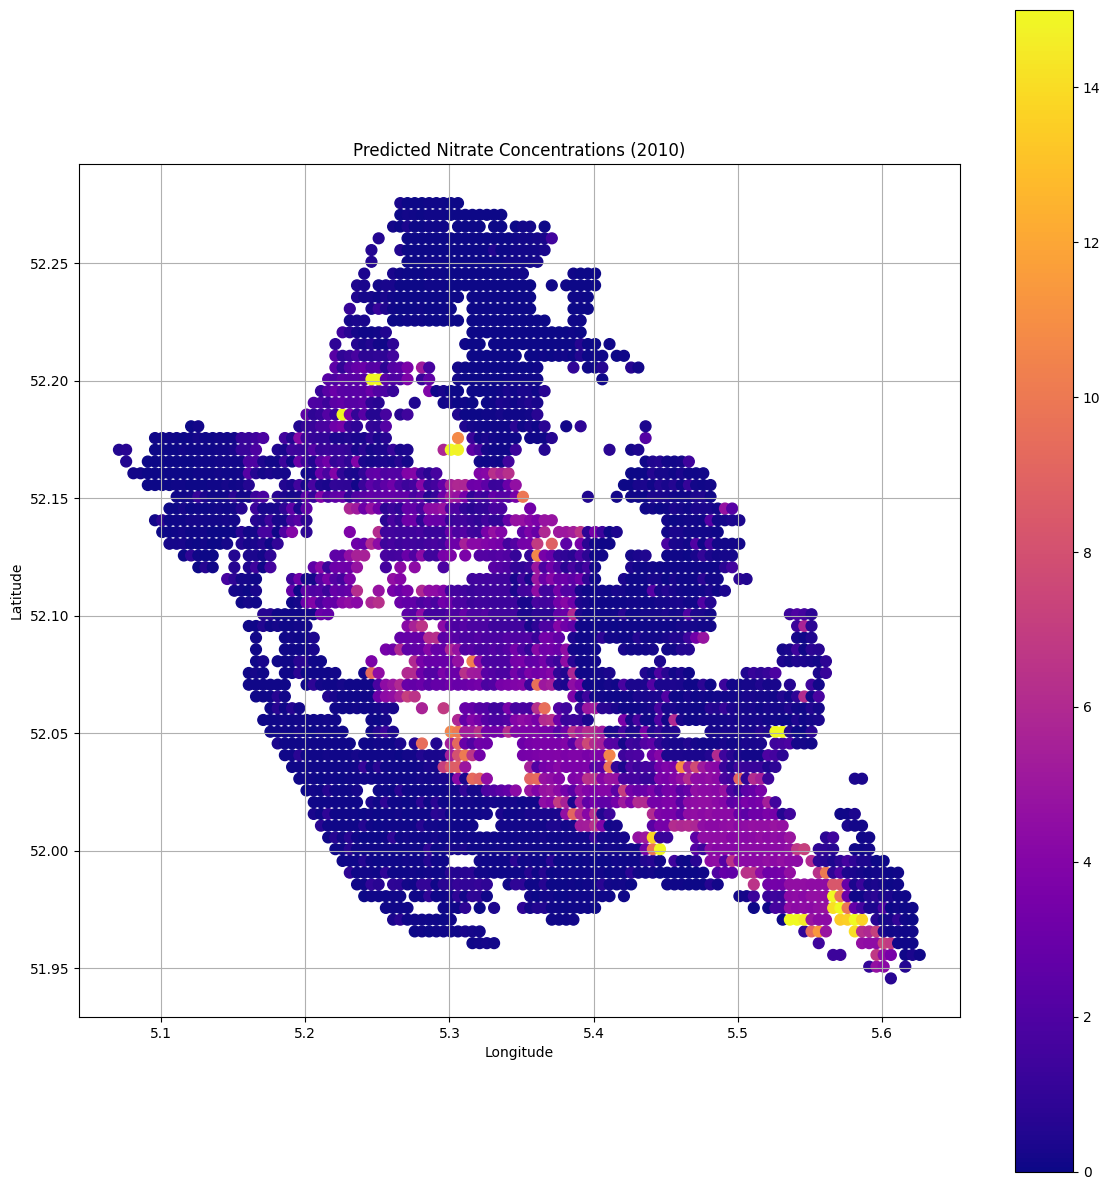

In [748]:
gdf_2010 = gpd.GeoDataFrame(grid_df_2010, geometry=gpd.points_from_xy(grid_df_2010["lon"], grid_df_2010["lat"]))
gdf_2010.crs = "EPSG:4326"

fig, ax = plt.subplots(figsize=(12, 12))
gdf_2010.plot(
    column="nitrate_pred_ensemble",
    cmap="plasma",
    legend=True,
    markersize=60,
    ax=ax,
    vmin=0,     # set minimum color value
    vmax=15     # cap everything above 20 to the same color
)

ax.set_title(f"Predicted Nitrate Concentrations ({year})")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.grid(True)
plt.tight_layout()
plt.show()


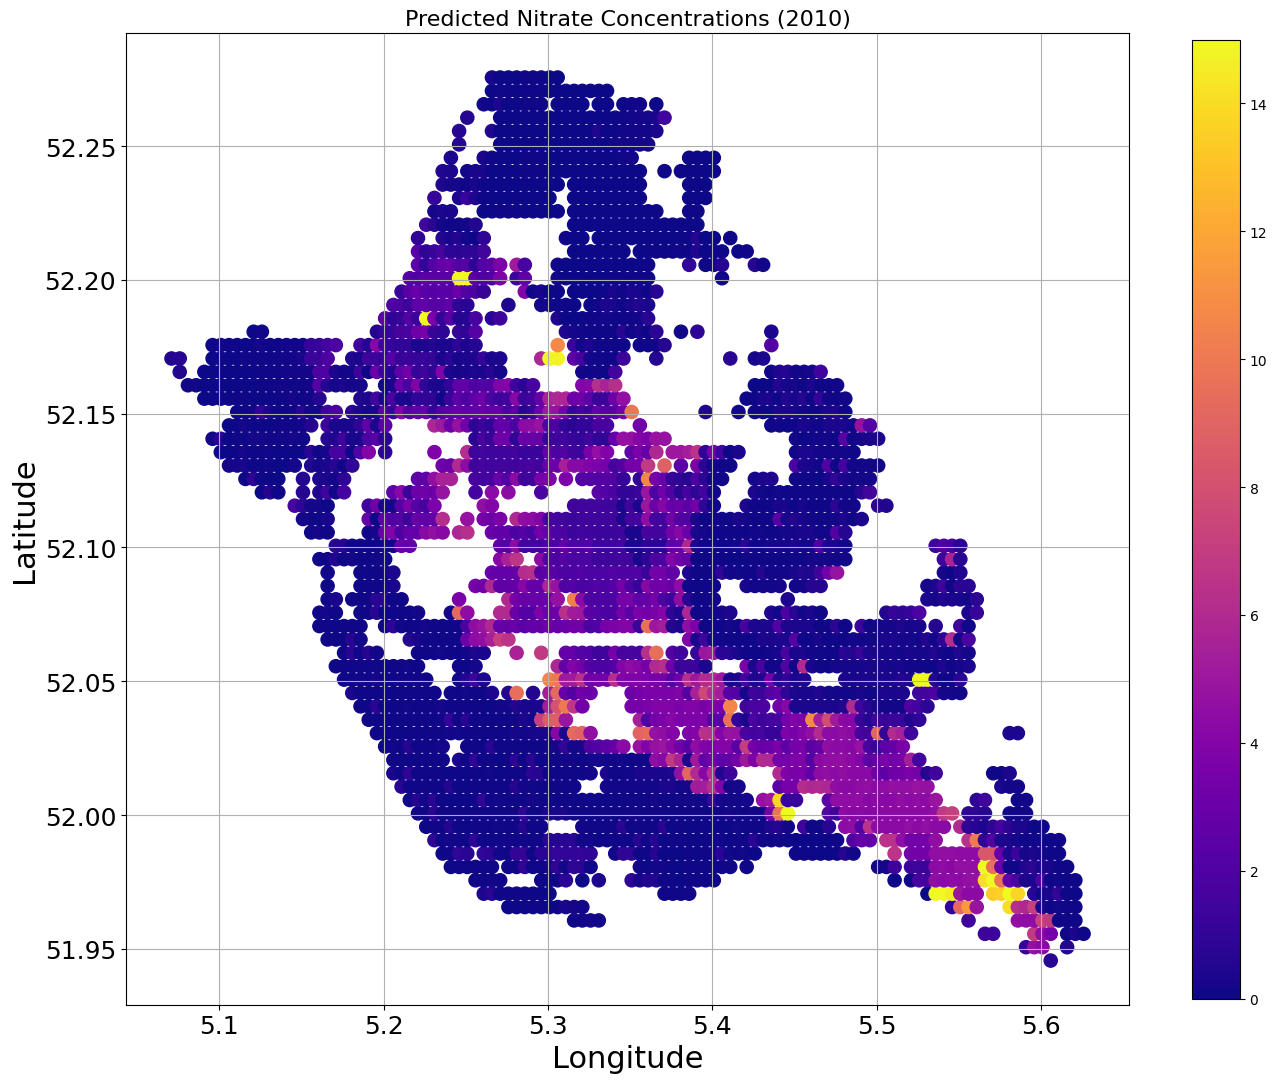

In [749]:
fig, ax = plt.subplots(figsize=(14, 14))
gdf_2010.plot(
    column="nitrate_pred_ensemble",
    cmap="plasma",
    legend=True,
    markersize=90,
    ax=ax,
    vmin=0,
    vmax=15,
    legend_kwds={"shrink": 0.7}  # shrink the color bar
)

ax.set_title(f"Predicted Nitrate Concentrations ({year})", fontsize=16)
ax.set_xlabel("Longitude", fontsize=22)
ax.set_ylabel("Latitude", fontsize=22)
ax.tick_params(axis='both', labelsize=18)
ax.grid(True)
plt.tight_layout()
plt.show()


<Axes: >

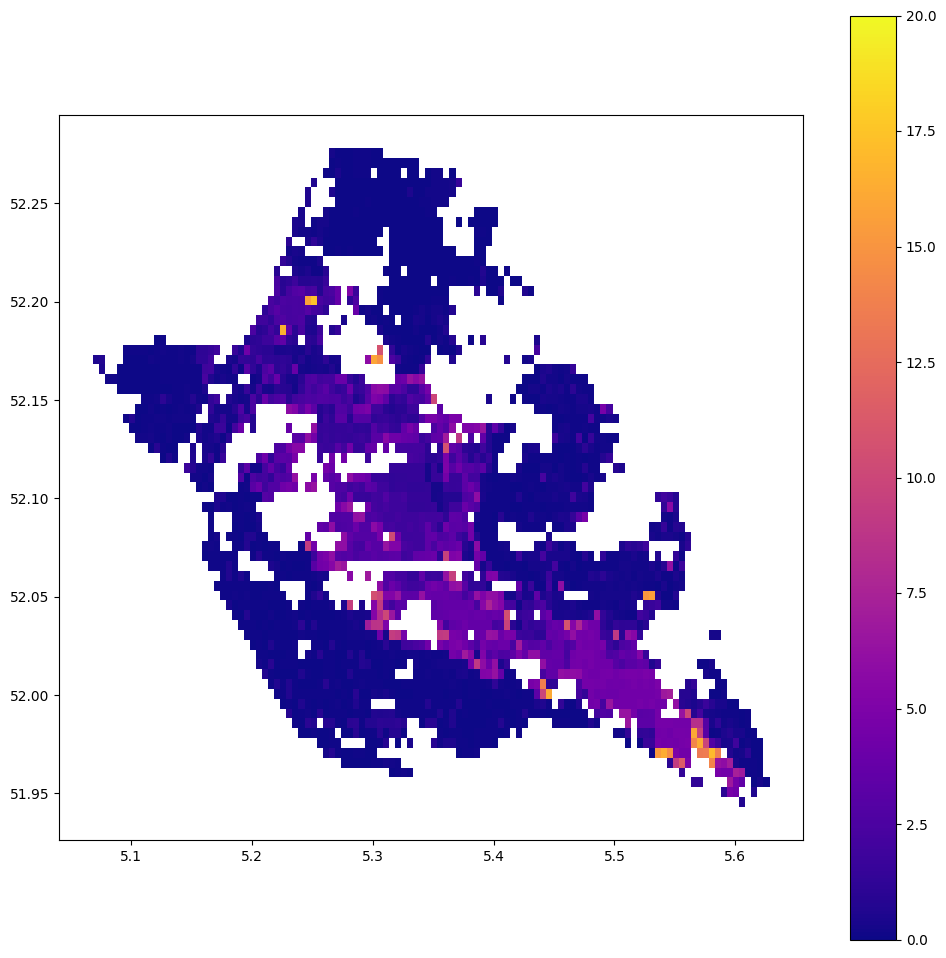

In [750]:
from shapely.geometry import box

cell_size = 0.005  # adjust based on your grid resolution

def point_to_cell(point, size):
    x, y = point.x, point.y
    return box(x - size/2, y - size/2, x + size/2, y + size/2)

gdf_2010["geometry"] = gdf_2010.geometry.apply(lambda pt: point_to_cell(pt, cell_size))

fig, ax = plt.subplots(figsize=(12, 12))
gdf_2010.plot(
    column="nitrate_pred_ensemble",
    cmap="plasma",
    legend=True,
    ax=ax,
    edgecolor=None,
    linewidth=0,
    vmin=0,
    vmax=20
)


# YEAR 2021

In [751]:
year = 2021

In [752]:
grid_data_populated_path = f'/Users/Administrator/Documents/University/Year 3/2b/Thesis/Bachelor-Thesis/data/aligned/grid_{year}.csv'
grid_df_2021 = pd.read_csv(grid_data_populated_path)

In [753]:
grid_df_2021 = grid_df_2021.dropna()
len(grid_df_2021)

2948

In [754]:
features = ['population', 'groundwater depth', 'elevation', 'landuse code',
            'precipitation','temperature', 'n deposition',
            'mainsoilclassification_1', 'organicmattercontent_1', 'density_1',
            'acidity_1', 'lon', 'lat']
X_grid = grid_df_2021[features]

In [755]:
grid_df_2021["nitrate_pred_rf"] = np.maximum(rf_model.predict(X_grid), 0)
grid_df_2021["nitrate_pred_xgb"] = np.maximum(xgb_model.predict(X_grid), 0)
# grid_df_2021["nitrate_pred_lr"] = np.maximum(lr_model.predict(X_grid), 0)

/Users/Administrator/Documents/University/Year 3/2b/Thesis/Bachelor-Thesis/spatial_env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/Administrator/Documents/University/Year 3/2b/Thesis/Bachelor-Thesis/spatial_env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [756]:
# Shape: (n_models, n_samples)
predictions = np.vstack([
    grid_df_2021["nitrate_pred_rf"].values,
    grid_df_2021["nitrate_pred_xgb"].values
    # grid_df_2021["nitrate_pred_lr"].values
])

In [757]:
# Compute std per model
model_stds = np.std(predictions, axis=1)  # std per model
inv_model_stds = 1 / (model_stds + 1e-8)  # avoid division by zero
model_weights = inv_model_stds / np.sum(inv_model_stds)  # normalize

print("Model Weights:", model_weights)

Model Weights: [0.48678153 0.51321847]


In [758]:
# Weighted average
ensemble_pred = np.average(predictions, axis=0, weights=model_weights)

# Save to DataFrame
grid_df_2021["nitrate_pred_ensemble"] = ensemble_pred

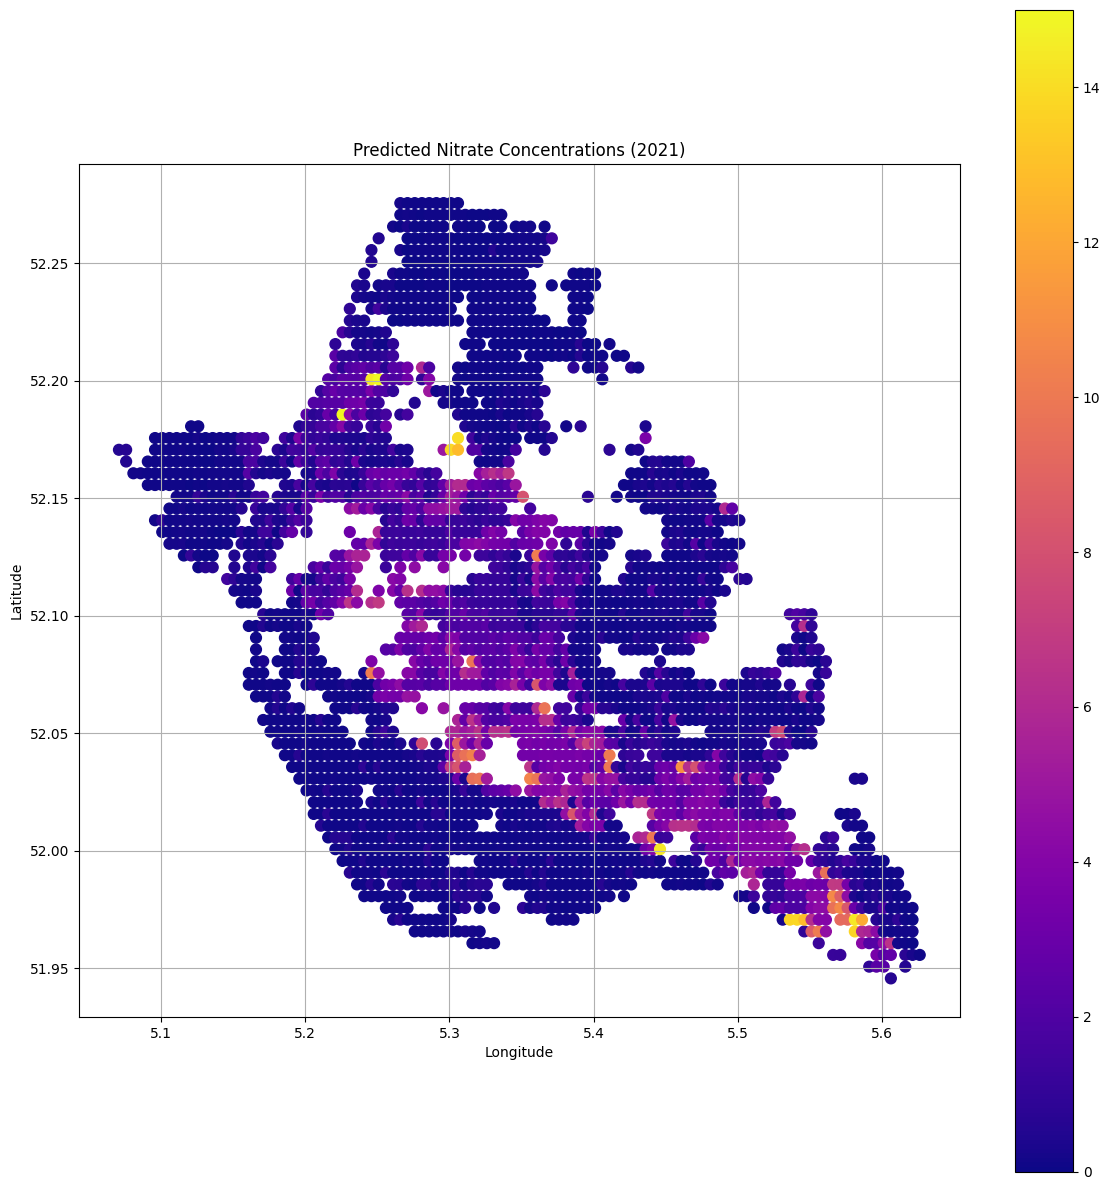

In [759]:
gdf_2021 = gpd.GeoDataFrame(grid_df_2021, geometry=gpd.points_from_xy(grid_df_2021["lon"], grid_df_2021["lat"]))
gdf_2021.crs = "EPSG:4326"

fig, ax = plt.subplots(figsize=(12, 12))
gdf_2021.plot(
    column="nitrate_pred_ensemble",
    cmap="plasma",
    legend=True,
    markersize=60,
    ax=ax,
    vmin=0,     # set minimum color value
    vmax=15     # cap everything above 20 to the same color
)

ax.set_title(f"Predicted Nitrate Concentrations ({year})")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.grid(True)
plt.tight_layout()
plt.show()

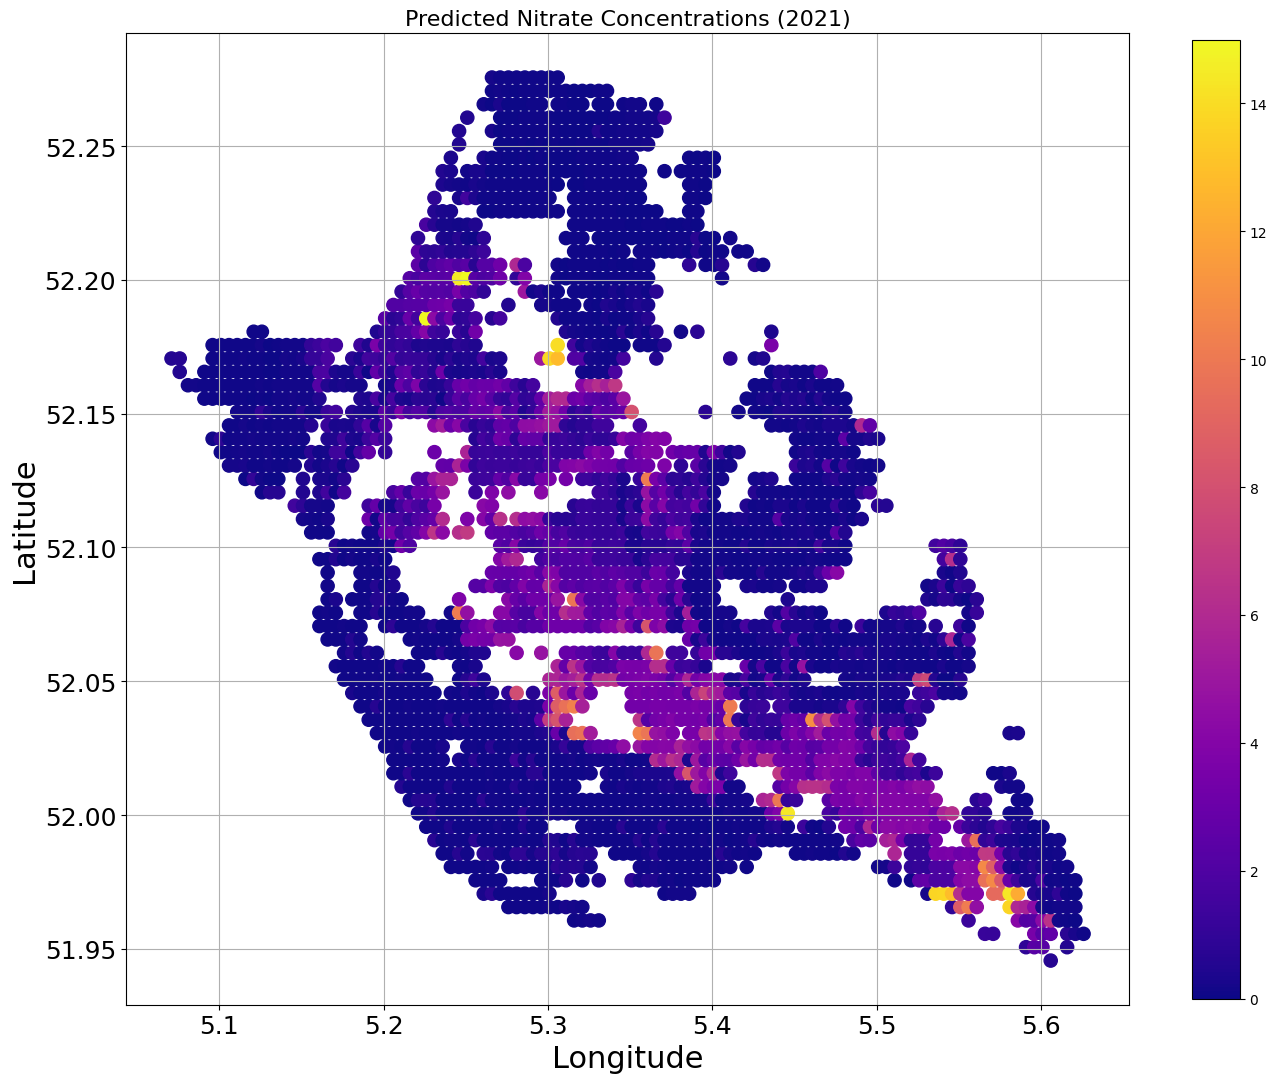

In [760]:
fig, ax = plt.subplots(figsize=(14, 14))
gdf_2021.plot(
    column="nitrate_pred_ensemble",
    cmap="plasma",
    legend=True,
    markersize=90,
    ax=ax,
    vmin=0,
    vmax=15,
    legend_kwds={"shrink": 0.7}  # shrink the color bar
)

ax.set_title(f"Predicted Nitrate Concentrations ({year})", fontsize=16)
ax.set_xlabel("Longitude", fontsize=22)
ax.set_ylabel("Latitude", fontsize=22)
ax.tick_params(axis='both', labelsize=18)
ax.grid(True)
plt.tight_layout()
plt.show()



## Plot difference

In [761]:
gdf_diff = gdf_2021.copy()
gdf_diff["nitrate_diff"] = gdf_2021["nitrate_pred_ensemble"] - gdf_2010["nitrate_pred_ensemble"]

In [762]:
gdf_2021

,geometry,date,soil region,landuse code,population,groundwater depth,elevation,lon,lat,precipitation,temperature,n deposition,mainsoilclassification_1,organicmattercontent_1,density_1,acidity_1,nitrate_pred_rf,nitrate_pred_xgb,nitrate_pred_ensemble
0,POINT (5.07091 52.17062),2020-07-01 10:00:00+00:00,veen,27.0,40.0,-3.238081,0.875438,5.07091,52.170625,35.0,154.666667,15.617805,Veengronden,40.0,0.543,4.5,0.433662,0.654004,0.546746
1,POINT (5.07591 52.16562),2020-07-01 10:00:00+00:00,veen,45.0,0.0,-3.238081,-2.295543,5.07591,52.165625,35.0,154.666667,15.617805,Veengronden,40.0,0.543,4.5,0.292341,0.664496,0.483338
2,POINT (5.07591 52.17062),2020-07-01 10:00:00+00:00,veen,1.0,105.0,-3.238081,-2.573272,5.07591,52.170625,35.0,154.666667,15.617805,Veengronden,40.0,0.543,4.5,0.442360,0.727778,0.588842
3,POINT (5.08091 52.16062),2020-07-01 10:00:00+00:00,veen,45.0,120.0,-3.238081,-1.684335,5.08091,52.160625,35.0,154.666667,17.788890,Moerige gronden,25.0,0.597,4.8,0.105070,0.169662,0.138220
7,POINT (5.08591 52.16062),2020-07-01 10:00:00+00:00,veen,45.0,120.0,-3.238081,-1.595895,5.08591,52.160625,35.0,154.666667,17.788890,Moerige gronden,9.0,1.260,4.8,0.113195,0.175446,0.145143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3960,POINT (5.62091 51.96062),2020-07-01 10:00:00+00:00,zand,1.0,0.0,5.759792,6.000000,5.62091,51.960625,35.0,154.666667,19.259625,Rivierkleigronden,6.0,1.280,5.1,0.073396,0.042422,0.057500
3961,POINT (5.62091 51.96562),2020-07-01 10:00:00+00:00,zand,25.0,0.0,5.759792,6.956209,5.62091,51.965625,35.0,154.666667,19.259625,Rivierkleigronden,5.0,1.246,5.3,0.130055,0.172157,0.151663
3962,POINT (5.62091 51.97062),2020-07-01 10:00:00+00:00,zand,1.0,0.0,5.237199,6.000000,5.62091,51.970625,35.0,154.666667,17.368680,Rivierkleigronden,6.0,1.152,5.3,0.064963,0.048382,0.056453
3963,POINT (5.62091 51.97562),2020-07-01 10:00:00+00:00,zand,1.0,0.0,5.237199,5.956651,5.62091,51.975625,35.0,154.666667,15.687840,Rivierkleigronden,6.0,1.152,5.3,0.077084,0.052700,0.064569


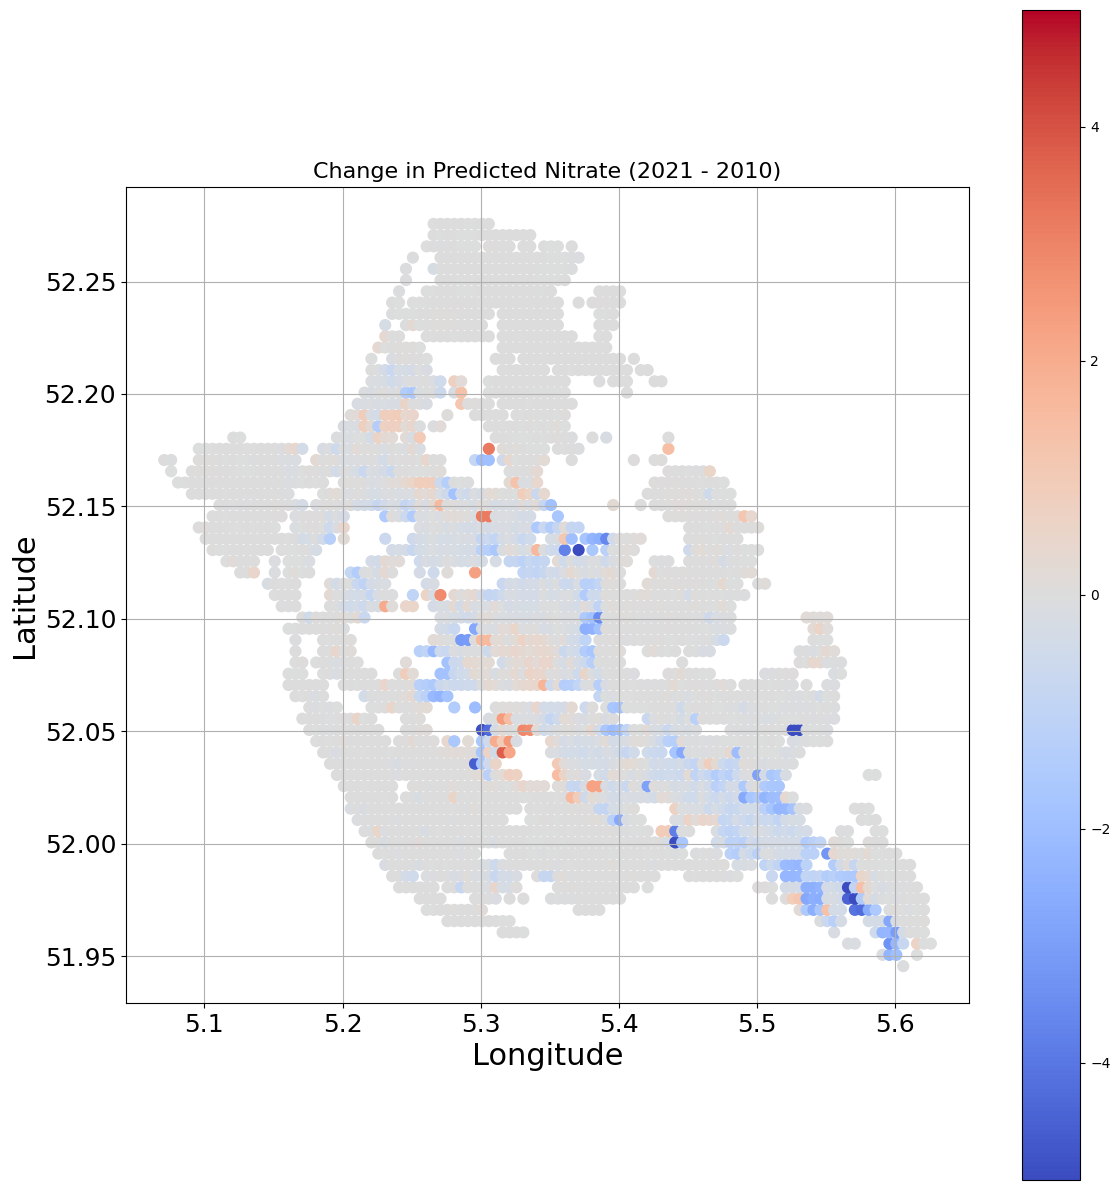

In [766]:
fig, ax = plt.subplots(figsize=(12, 12))
gdf_diff.plot(
    column="nitrate_diff",
    cmap="coolwarm",        # diverging colormap: blue = decrease, red = increase
    legend=True,
    markersize=60,
    ax=ax,
    vmin=-5, vmax=5          # clip extremes for better contrast
)

ax.set_title("Change in Predicted Nitrate (2021 - 2010)", fontsize=16)
ax.set_xlabel("Longitude", fontsize=22)
ax.set_ylabel("Latitude", fontsize=22)
ax.tick_params(axis='both', labelsize=18)
ax.grid(True)
plt.tight_layout()
plt.show()



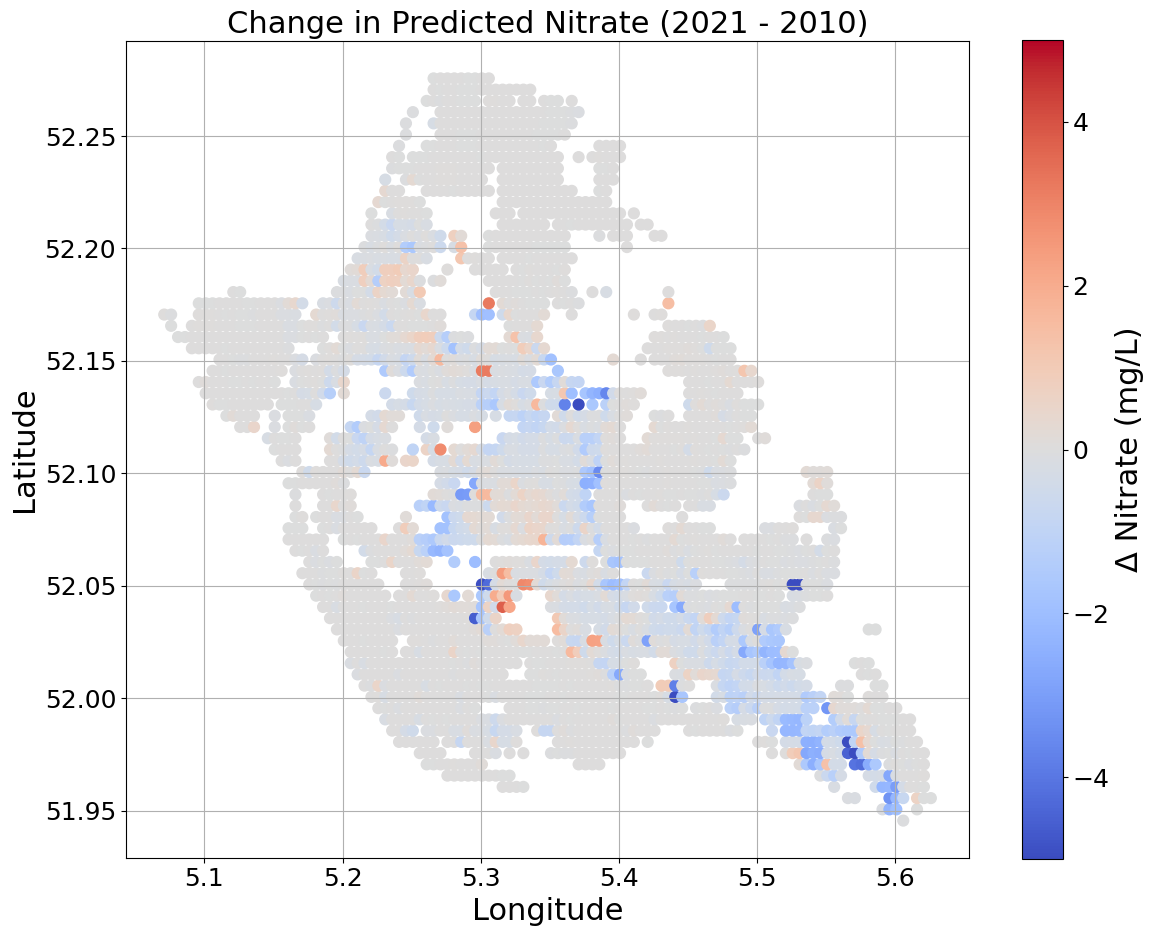

In [773]:
import matplotlib.pyplot as plt
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(12, 12))

# Plot without legend
gdf_diff_plot = gdf_diff.plot(
    column="nitrate_diff",
    cmap="coolwarm",
    markersize=60,
    ax=ax,
    vmin=-5,
    vmax=5,
    legend=False
)

# Create and customize the colorbar
norm = mpl.colors.Normalize(vmin=-5, vmax=5)
sm = mpl.cm.ScalarMappable(cmap="coolwarm", norm=norm)
sm._A = []  # for compatibility with older matplotlib versions
cbar = fig.colorbar(sm, ax=ax, shrink=0.7)  # Make colorbar smaller
cbar.ax.tick_params(labelsize=18)  # Make tick numbers larger
cbar.set_label("Δ Nitrate (mg/L)", fontsize=22)

# Axes formatting
ax.set_title("Change in Predicted Nitrate (2021 - 2010)", fontsize=22)
ax.set_xlabel("Longitude", fontsize=22)
ax.set_ylabel("Latitude", fontsize=22)
ax.tick_params(axis='both', labelsize=18)
ax.grid(True)

plt.tight_layout()
plt.show()


In [764]:
print("Mean change:", gdf_diff["nitrate_diff"].mean())
print("Std change:", gdf_diff["nitrate_diff"].std())
print("Max increase:", gdf_diff["nitrate_diff"].max())
print("Max decrease:", gdf_diff["nitrate_diff"].min())

Mean change: -0.13865760439803207
Std change: 0.6320498644789762
Max increase: 3.7856227990254485
Max decrease: -8.23256449035727


In [765]:
from scipy.stats import ttest_rel
t_stat, p_val = ttest_rel(gdf_2021["nitrate_pred_ensemble"], gdf_2010["nitrate_pred_ensemble"])
print("T-test p-value:", p_val)

T-test p-value: 5.540668663325996e-32
